# The Butterfly Effect

Chloe Cousin - Online Jan 24 Data Science cohort

- __Sprint__: 2 - more advanced preprocessing, EDA and baseline model creation
- __Date__: April 2, 2024

# Introduction

## Imports

In [449]:
# Base packages
import pandas as pd
import numpy as np

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Stats
from scipy import stats

# Time Series
from statsmodels.api import tsa
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ignore futurewarnings
import warnings
warnings.filterwarnings('ignore')

## Datasets

### D1 - Butterfly sightings / Traits / Vulnerable Species

This dataset has been preprocessed in Sprint 1 (see 'Capstone - Sprint 1' Jupyter notebook), we are importing the cleaned file here.

NOTE : EXPLIQUER CE QUI A ETE FAIT

In [13]:
df = pd.read_csv('data/df_NBN_UKBMS4.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [14]:
df.head()

,Unnamed: 0,Occurrence_ID,Scientific_name,Common_name,Start_date,Start_date_day,Start_date_month,Start_date_year,OSGR,Latitude_WGS84,Longitude_WGS84,Family,Genus,OSGR_100km,OSGR_10km,OSGR_2km,OSGR_1km,State/Province,WS_L_Fem,WS_U_Fem,WS_L_Mal,WS_U_Mal,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,FlightDuration,Voltinism,CanopyAffinity,EdgeAffinity,MoistureAffinity,DisturbanceAffinity,NumberOfHostplantFamilies,Red_List_category,2010_Red_List_category,Year_Month
0,0,5616398,Gonepteryx rhamni,Brimstone,2009-03-16,16,3,2009,TL2550,52.138550,-0.167627,Pieridae,Gonepteryx,TL,TL25,TL25K,TL2550,England,5.2,6.40,5.2,6.40,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,11.0,B,Mixed canopy (open affinity),Edge-associated (strong),Moisture association varies,Disturbance-associated (strong),2.0,Least Concern,Least Concern,2009-03-01
1,1,7628186,Gonepteryx rhamni,Brimstone,2009-03-18,18,3,2009,SU8533,51.094445,-0.780437,Pieridae,Gonepteryx,SU,SU83,SU83L,SU8533,England,5.2,6.40,5.2,6.40,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,11.0,B,Mixed canopy (open affinity),Edge-associated (strong),Moisture association varies,Disturbance-associated (strong),2.0,Least Concern,Least Concern,2009-03-01
2,2,5815274,Polygonia c-album,Comma,2009-03-22,22,3,2009,TQ1684,51.547376,-0.321280,Nymphalidae,Polygonia,TQ,TQ18,TQ18S,TQ1684,England,4.0,5.20,4.1,4.90,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,M,Canopy generalist,Edge association varies,Mesic-associated (strong),Disturbance-avoidant (strong),10.0,Least Concern,Least Concern,2009-03-01
3,3,5616417,Pieris brassicae,Large White,2009-03-07,7,3,2009,ST7913,50.920590,-2.293015,Pieridae,Pieris,ST,ST71,ST71W,ST7913,England,5.1,5.85,4.9,5.65,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,M,Mixed canopy (open affinity),Seen near and away from edges,Xeric-associated (weak),Disturbance-associated (strong),6.0,Least Concern,Least Concern,2009-03-01
4,4,5616482,Polygonia c-album,Comma,2009-03-19,19,3,2009,SU6469,51.420852,-1.073789,Nymphalidae,Polygonia,SU,SU66,SU66P,SU6469,England,4.0,5.20,4.1,4.90,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,M,Canopy generalist,Edge association varies,Mesic-associated (strong),Disturbance-avoidant (strong),10.0,Least Concern,Least Concern,2009-03-01


In [15]:
df = df.drop(columns='Unnamed: 0')

In [19]:
df['Year_Month'] = pd.to_datetime(df['Year_Month'])
df['Start_date'] = pd.to_datetime(df['Start_date'])

In [20]:
df.shape

(6392186, 43)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392186 entries, 0 to 6392185
Data columns (total 43 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Occurrence_ID              int64         
 1   Scientific_name            object        
 2   Common_name                object        
 3   Start_date                 datetime64[ns]
 4   Start_date_day             int64         
 5   Start_date_month           int64         
 6   Start_date_year            int64         
 7   OSGR                       object        
 8   Latitude_WGS84             float64       
 9   Longitude_WGS84            float64       
 10  Family                     object        
 11  Genus                      object        
 12  OSGR_100km                 object        
 13  OSGR_10km                  object        
 14  OSGR_2km                   object        
 15  OSGR_1km                   object        
 16  State/Province             object   

### D2 - UK Weather

In [ ]:
df_london_weather = pd.read_fwf('data/heathrowdata.txt')

In [ ]:
df_london_weather.head()

In [ ]:
df_london_weather.shape

# EDA and Data Preprocessing

Steps:

- Indexing sightings per year and month:
    - Get the number of surveys per year 

## Get London sightings

London coordinates: 51.5069929036787, -0.12895107981895967

- North limit (Enfield borough): 51.65195042315941, -0.08106613267368643
- West limit (Hillington borough): 51.537921096083025, -0.45221704012735686 
- South limit (Croydon borough): 51.3769109423846, -0.09758628303502302
- East Limit (Upminster): 51.55626396921364, 0.24955389351473162

In [23]:
London_coord = {'North limit (Enfield borough)': [51.65195042315941, -0.08106613267368643],
                'West limit (Hillington borough)': [51.537921096083025, -0.45221704012735686],
                'South limit (Croydon borough)': [51.3769109423846, -0.09758628303502302], 
                'East Limit (Upminster)': [51.55626396921364, 0.24955389351473162]}
London_coord_df = pd.DataFrame(London_coord, index=['Latitude', 'Longitude']).T
London_coord_df

,Latitude,Longitude
North limit (Enfield borough),51.651950,-0.081066
West limit (Hillington borough),51.537921,-0.452217
South limit (Croydon borough),51.376911,-0.097586
East Limit (Upminster),51.556264,0.249554


In [24]:
print(f"Min Lat value: {London_coord_df['Latitude'].min()}")
print(f"Max Lat value: {London_coord_df['Latitude'].max()}")
print(f"Min Lon value: {London_coord_df['Longitude'].min()}")
print(f"Max Lon value: {London_coord_df['Longitude'].max()}")

Min Lat value: 51.3769109423846
Max Lat value: 51.65195042315941
Min Lon value: -0.45221704012735686
Max Lon value: 0.24955389351473162


In [25]:
GLondon_df = df[(df['Latitude_WGS84'] >= London_coord_df['Latitude'].min()) & \
                (df['Latitude_WGS84'] <= London_coord_df['Latitude'].max()) & \
                (df['Longitude_WGS84'] >= London_coord_df['Longitude'].min()) & \
                (df['Longitude_WGS84'] <= London_coord_df['Longitude'].max())]

In [26]:
GLondon_df.describe()

,Occurrence_ID,Start_date,Start_date_day,Start_date_month,Start_date_year,Latitude_WGS84,Longitude_WGS84,WS_L_Fem,WS_U_Fem,WS_L_Mal,WS_U_Mal,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,FlightDuration,NumberOfHostplantFamilies,Year_Month
count,1.628870e+05,162887,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887
mean,4.165022e+06,2012-10-02 12:11:04.362410752,15.594510,6.709259,2012.240627,51.501557,-0.180515,3.110379,4.483747,3.599826,4.326599,0.416368,0.498229,0.843603,0.714409,0.964970,0.915021,0.989809,0.915021,0.965160,0.824154,0.408461,0.299214,8.754419,4.187885,2012-09-17 21:54:58.672085504
min,6.000000e+00,2001-03-25 00:00:00,1.000000,3.000000,2001.000000,51.379167,-0.440290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2001-03-01 00:00:00
25%,1.829190e+06,2008-07-21 00:00:00,8.000000,6.000000,2008.000000,51.438260,-0.281758,2.350000,3.800000,3.400000,3.800000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,7.000000,1.000000,2008-07-01 00:00:00
50%,4.888200e+06,2013-07-18 00:00:00,16.000000,7.000000,2013.000000,51.497967,-0.182863,3.700000,4.500000,3.600000,4.400000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,9.000000,2.000000,2013-07-01 00:00:00
75%,6.374192e+06,2017-08-26 00:00:00,23.000000,8.000000,2017.000000,51.562974,-0.034953,3.900000,4.700000,3.900000,4.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,6.000000,2017-08-01 00:00:00
max,8.168492e+06,2020-10-19 00:00:00,31.000000,10.000000,2020.000000,51.649494,0.124656,5.900000,7.600000,5.500000,6.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,24.000000,2020-10-01 00:00:00
std,2.476279e+06,NaN,8.773763,1.394315,5.550457,0.073003,0.149540,1.613779,1.038287,0.875043,1.012160,0.492958,0.499998,0.363232,0.451697,0.183857,0.278852,0.100436,0.278852,0.183375,0.380690,0.491551,0.457915,2.890142,4.537040,NaN


In [27]:
GLondon_df.shape

(162887, 43)

## Indexing sightings per Year/Month

### Number of sightings per Year/Month

In [235]:
# Counts of sightings per month in London sites selected
Sightings_London = GLondon_df['Year_Month'].value_counts()
Sightings_London = pd.DataFrame(Sightings_London).reset_index().sort_values('Year_Month').set_index('Year_Month')
Sightings_London = Sightings_London.rename(columns={'count':'Sightings'})
Sightings_London.head(3)

,Sightings
Year_Month,
2001-03-01,10
2001-04-01,197
2001-05-01,544


In [212]:
# Getting first and last date in the dataframe
print(f'First date: {Sightings_London.index.min()}')
print(f'Last date: {Sightings_London.index.max()}')

First date: 2001-03-01 00:00:00
Last date: 2020-10-01 00:00:00


__COMMENT:__ We will also add dates from Jan-Feb 2001 and Nov-Dec 2020 so as to have full years to compare.

We have a difference of 86 months over 20 years


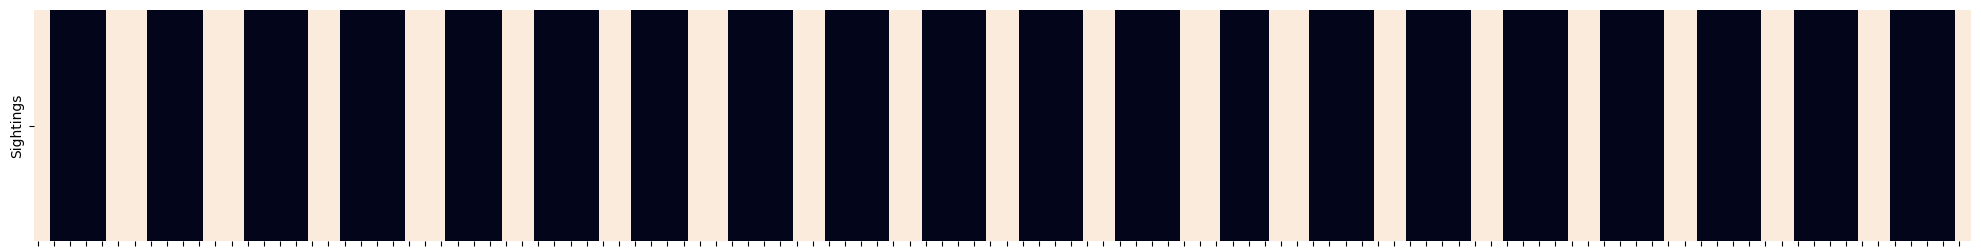

In [237]:
######### Making sure we have values for each month of each year #########

# Getting every months of each year between first and last date in the dataset 
full_index = full_range = pd.date_range(start='2001-01-01', 
                                        end='2020-12-01', 
                                        freq='MS')
diff_month = len(full_index.difference(Sightings_London.index))
print(f'We have a difference of {diff_month} months over 20 years')

# Reindexing sightings dataframe to full range of months
Sightings_London_2 = Sightings_London.reindex(full_index)

# See where the missing values are located
plt.figure(figsize=(25, 3))
ax = sns.heatmap(Sightings_London_2.isna().T, cbar=False)
ax.set(xticklabels=[])
plt.show()

__COMMENT:__ It looks like the missing values are located in the winter time when there is no surveys organised. The best approach to filling the missing values will therefore be to replace with 0.

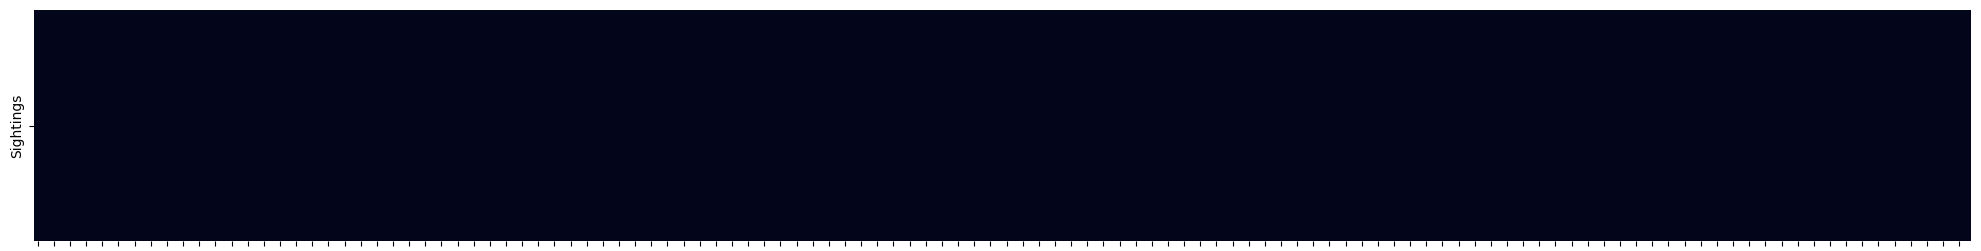

In [238]:
# Filling missing values
Sightings_London_2 = Sightings_London_2.fillna(0) 

# Sanity Check
plt.figure(figsize=(25, 3))
ax = sns.heatmap(Sightings_London_2.isna().T, cbar=False)
ax.set(xticklabels=[])
plt.show()

__COMMENT:__ All missing values have been filled, we can proceed.

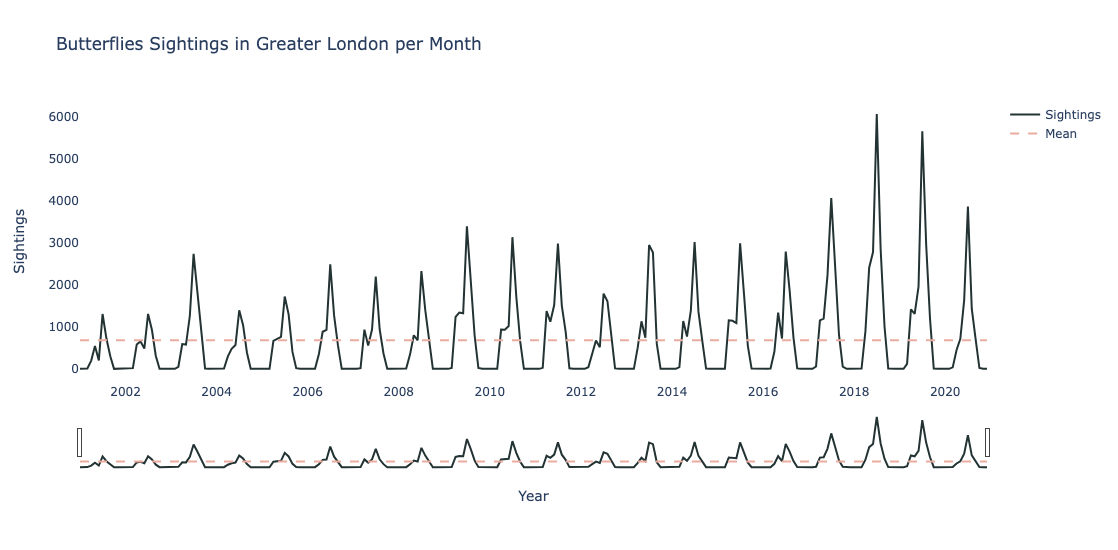

In [239]:
# Plot sightings per month
fig = go.Figure()
fig.add_trace(go.Scatter(x=Sightings_London_2.index, 
                         y=Sightings_London_2['Sightings'], 
                         mode='lines', name='Sightings', line=dict(color='#233333')))
fig.add_trace(go.Scatter(x=Sightings_London_2.index, 
                         y=[Sightings_London_2['Sightings'].mean()]*len(Sightings_London_2), 
                         mode='lines', name='Mean', line_dash='dash', line=dict(color='#EBACA0')))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(yaxis_title='Sightings', xaxis_title='Year',
                  title='Butterflies Sightings in Greater London per Month',
                  width = 1100, height = 550, plot_bgcolor='white', showlegend=True)
# fig.update_layout(xaxis=dict(showgrid=False), yaxis=dict(showgrid=False))
fig.show()

__COMMENT:__ We can see on this first plot:

- A clear seasonal pattern, with a peak in the number of Sightings in July/August each year
- What seems to be an upward trend over the years, which will need to be confirmed by a seasonal decomposition
- The number of sightings varies from year to year: starting in 2009, we have a clear increase in the number of sightings but we still see two significant drops over the years, in 2012 and 2020 (the first one would need to be researched, the second one most likely due to the pandemic).

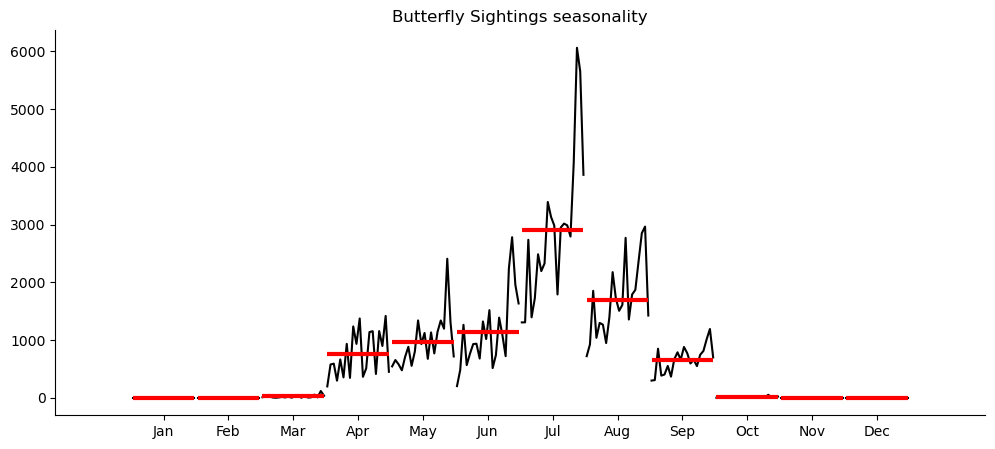

In [240]:
# Creating a seasonal plot
plt.figure(figsize=(12, 5))
month_plot(Sightings_London_2['Sightings'], ax=plt.gca())
plt.title('Butterfly Sightings seasonality')
sns.despine()
plt.show()

__COMMENT:__ We clearly see now that the sightings increase from April to July and then decrease. We have no sightings in the cold season (October to March).

In [241]:
decomposition = tsa.seasonal_decompose(Sightings_London_2, model='additive')
Sightings_London_2['Trend'] = decomposition.trend
Sightings_London_2['Seasonal'] = decomposition.seasonal
Sightings_London_2['Residuals'] = decomposition.resid

Sightings_London_2.head(5)

,Sightings,Trend,Seasonal,Residuals
2001-01-01,0.0,NaN,-686.176535,NaN
2001-02-01,0.0,NaN,-693.327851,NaN
2001-03-01,10.0,NaN,-672.172149,NaN
2001-04-01,197.0,NaN,82.378289,NaN
2001-05-01,544.0,NaN,289.439693,NaN


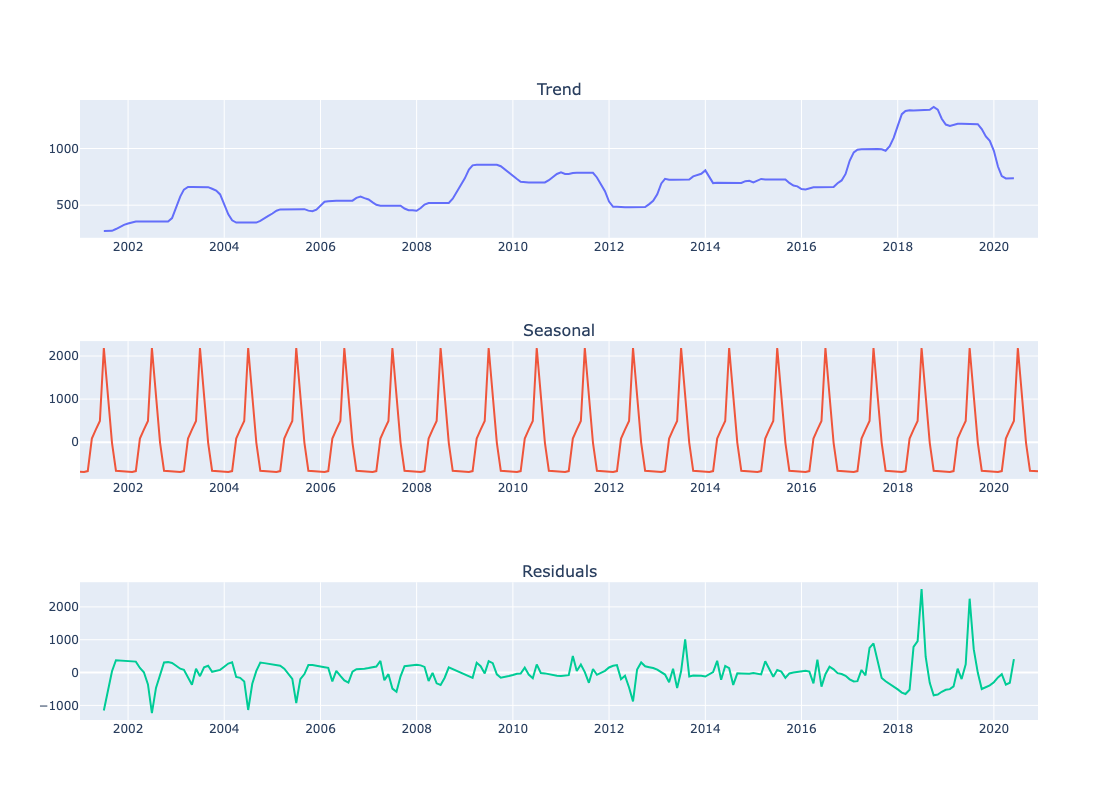

In [242]:
cols = ['Trend', 'Seasonal', 'Residuals']

fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=Sightings_London_2.index, y=Sightings_London_2[col]),
        row=i+1,
        col=1)

fig.update_layout(height=800, width=1150, showlegend=False)
fig.show()

### Number of surveys per Year/Month

In [243]:
Num_Surveys = GLondon_df.groupby(['Start_date'])['OSGR'].nunique() #This is counting the number of unique sites ('OSGR') surveyed per day
Num_Surveys = pd.DataFrame(Num_Surveys)
Num_Surveys = Num_Surveys.resample('MS').sum().reindex(full_index).fillna(0)
Num_Surveys = Num_Surveys.rename(columns={'OSGR':'NumSurveys'})
Num_Surveys.head()

,NumSurveys
2001-01-01,0.0
2001-02-01,0.0
2001-03-01,2.0
2001-04-01,26.0
2001-05-01,45.0


In [244]:
# Sanity Check
diff_month = len(full_index.difference(Num_Surveys.index))
print(f'We have a difference of {diff_month} months over 20 years')

We have a difference of 0 months over 20 years


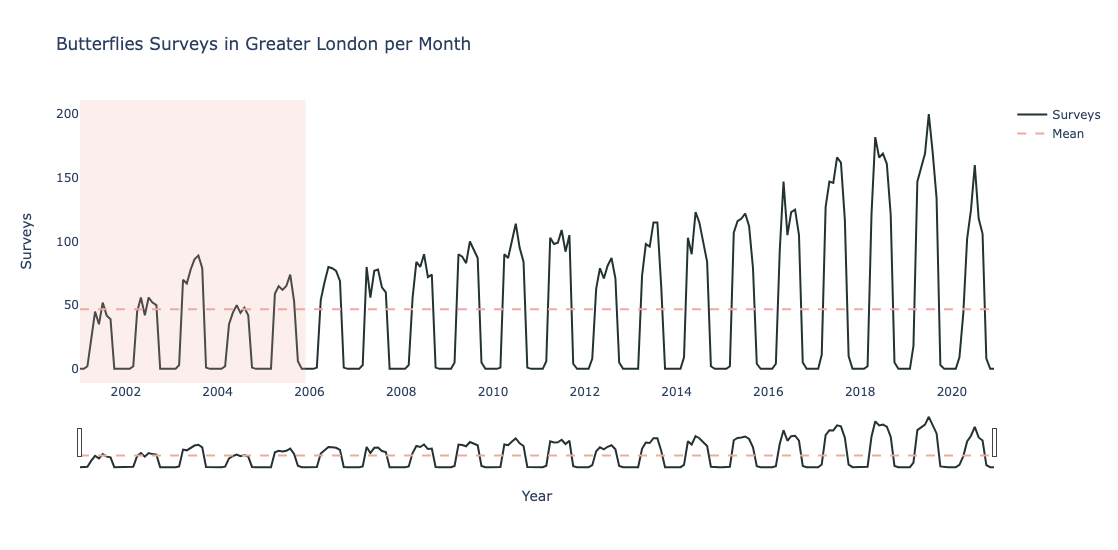

In [339]:
# Plot surveys per month
fig = go.Figure()
fig.add_trace(go.Scatter(x=Num_Surveys.index, 
                         y=Num_Surveys['NumSurveys'], 
                         mode='lines', name='Surveys', line=dict(color='#233333')))
fig.add_trace(go.Scatter(x=Num_Surveys.index, 
                         y=[Num_Surveys['NumSurveys'].mean()]*len(Num_Surveys), 
                         mode='lines', name='Mean', line_dash='dash', line=dict(color='#EBACA0')))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(yaxis_title='Surveys', xaxis_title='Year',
                  title='Butterflies Surveys in Greater London per Month',
                  width = 1100, height = 550, plot_bgcolor='white', showlegend=True)
fig.add_vrect(x0='2001-01-01', x1='2005-12-01', line_width=0, fillcolor="#EBACA0", opacity=0.2)
fig.show()

__COMMENT:__ Take 5 first years average number of surveys per month to calculate the weight for the following years. This will ensure that the weights are ...

### Sightings weighted

In [332]:
# Merging the Sightings and Surveys dataframes
Sightings_Surveys = pd.merge(Sightings_London_2.drop(columns=['Trend', 'Seasonal', 'Residuals']), Num_Surveys, 
                             left_index=True, right_index=True)

# Extracting month info for future merge with first year surveys numbers
Sightings_Surveys = Sightings_Surveys.reset_index()
Sightings_Surveys['Month'] = Sightings_Surveys['index'].dt.month
Sightings_Surveys = Sightings_Surveys.set_index('index')

# Isolating number of surveys from first year (will be used to calculate the weight of each month)
Sightings_Surveys_Base = Sightings_Surveys.iloc[:60,:]
Sightings_Surveys_Base = Sightings_Surveys_Base.groupby('Month')['NumSurveys'].mean()
Sightings_Surveys_Base = np.tile(Sightings_Surveys_Base.values, 20)

# Add 2001 number of Surveys per month over each year in the dataset
Sightings_Surveys['Surveys_Base'] = Sightings_Surveys_Base

# # Calculting index for each month of every year
Sightings_Surveys['Weight'] = round((Sightings_Surveys['NumSurveys'] / Sightings_Surveys['Surveys_Base']),2)
Sightings_Surveys['Sightings_Weighted'] = round(Sightings_Surveys['Sightings'] / Sightings_Surveys['Weight'],2)
Sightings_Surveys['Sightings_Weighted'] = Sightings_Surveys['Sightings_Weighted'].fillna(0)
Sightings_Surveys.tail()

,Sightings,NumSurveys,Month,Surveys_Base,Weight,Sightings_Weighted
index,,,,,,
2020-08-01,1425.0,118.0,8,61.0,1.93,738.34
2020-09-01,699.0,106.0,9,52.6,2.02,346.04
2020-10-01,20.0,8.0,10,1.6,5.00,4.00
2020-11-01,0.0,0.0,11,0.0,NaN,0.00
2020-12-01,0.0,0.0,12,0.0,NaN,0.00


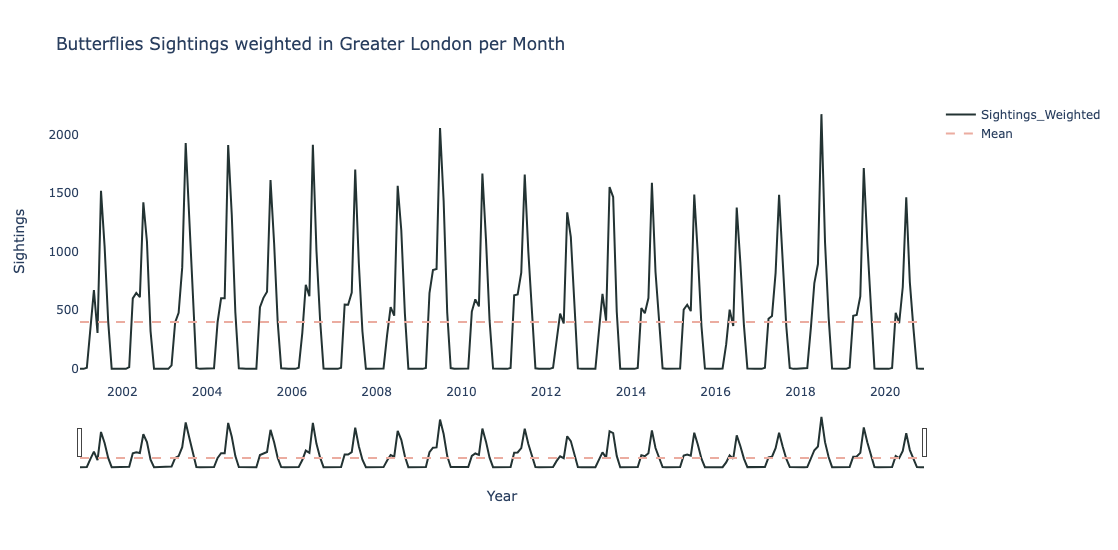

In [333]:
# Plot sightings weighted per month
fig = go.Figure()
fig.add_trace(go.Scatter(x=Sightings_Surveys.index, 
                         y=Sightings_Surveys['Sightings_Weighted'], 
                         mode='lines', name='Sightings_Weighted', line=dict(color='#233333')))
fig.add_trace(go.Scatter(x=Sightings_Surveys.index, 
                         y=[Sightings_Surveys['Sightings_Weighted'].mean()]*len(Sightings_Surveys), 
                         mode='lines', name='Mean', line_dash='dash', line=dict(color='#EBACA0')))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(yaxis_title='Sightings', xaxis_title='Year',
                  title='Butterflies Sightings weighted in Greater London per Month',
                  width = 1100, height = 550, plot_bgcolor='white', showlegend=True)
# fig.update_layout(xaxis=dict(showgrid=False), yaxis=dict(showgrid=False))
fig.show()

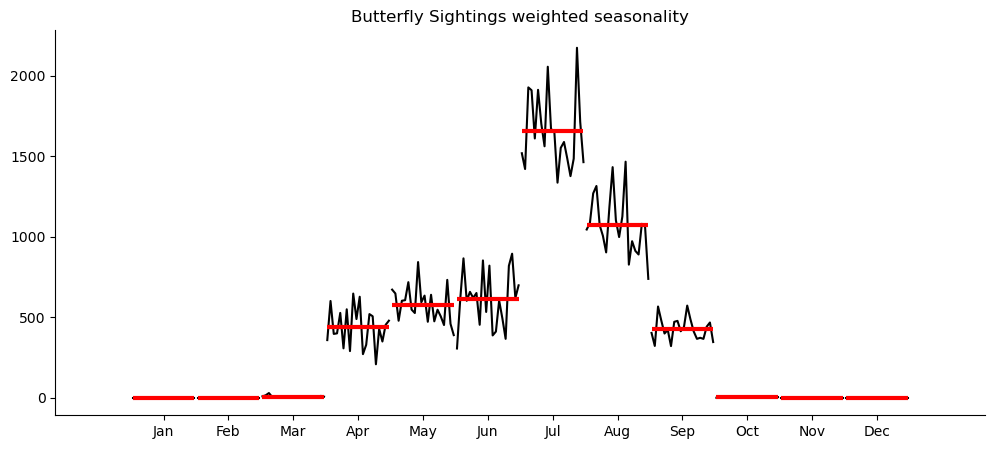

In [334]:
# Creating a seasonal plot
plt.figure(figsize=(12, 5))
month_plot(Sightings_Surveys['Sightings_Weighted'], ax=plt.gca())
plt.title('Butterfly Sightings weighted seasonality')
sns.despine()
plt.show()

In [335]:
decomposition = tsa.seasonal_decompose(Sightings_Surveys['Sightings_Weighted'], model='additive')
Sightings_Surveys['Trend'] = decomposition.trend
Sightings_Surveys['Seasonal'] = decomposition.seasonal
Sightings_Surveys['Residuals'] = decomposition.resid
Sightings_Surveys.head(5)

,Sightings,NumSurveys,Month,Surveys_Base,Weight,Sightings_Weighted,Trend,Seasonal,Residuals
index,,,,,,,,,
2001-01-01,0.0,0.0,1,0.0,NaN,0.00,NaN,-404.627774,NaN
2001-02-01,0.0,0.0,2,0.0,NaN,0.00,NaN,-403.834068,NaN
2001-03-01,10.0,2.0,3,1.8,1.11,9.01,NaN,-395.303257,NaN
2001-04-01,197.0,26.0,4,47.0,0.55,358.18,NaN,37.984331,NaN
2001-05-01,544.0,45.0,5,55.4,0.81,671.60,NaN,169.031349,NaN


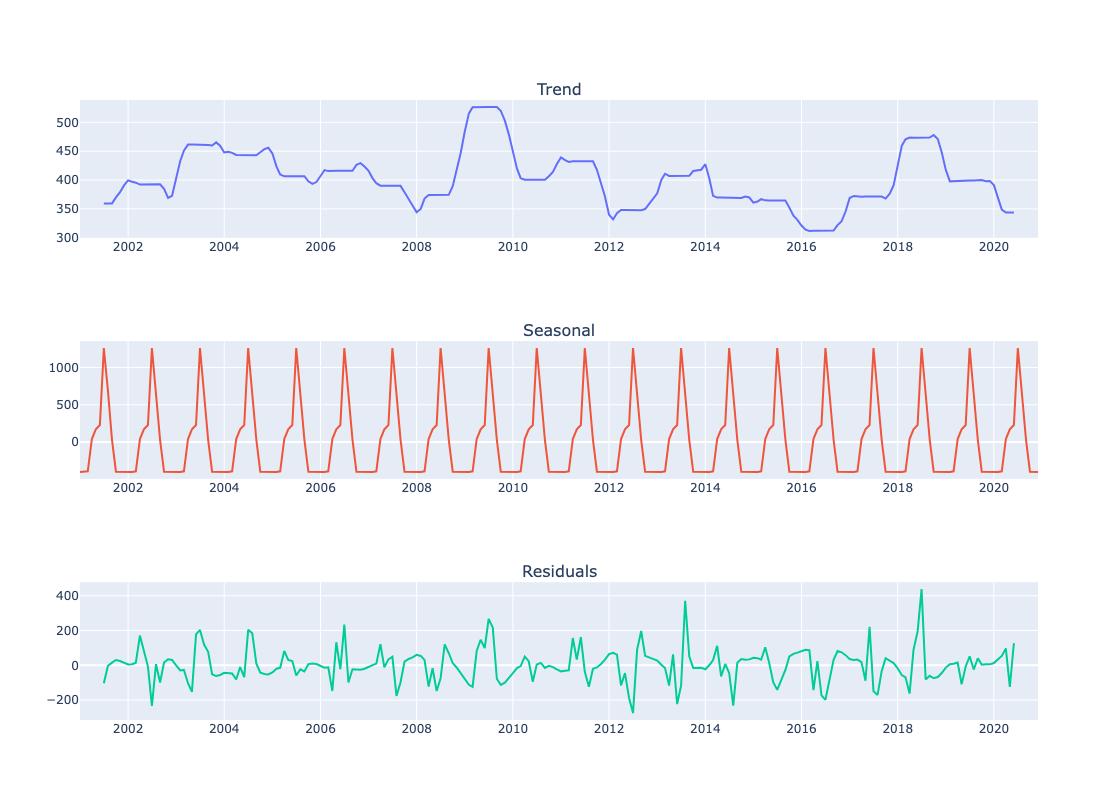

In [336]:
cols = ['Trend', 'Seasonal', 'Residuals']

fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=Sightings_Surveys.index, y=Sightings_Surveys[col]),
        row=i+1,
        col=1)

fig.update_layout(height=800, width=1150, showlegend=False)
fig.show()

# Time Series Models

## Baseline model: SARIMA

In [359]:
Sightings_Surveys['Year_Diff'] = Sightings_Surveys['Sightings_Weighted'].diff(12)
Sightings_Surveys.head()

,Sightings,NumSurveys,Month,Surveys_Base,Weight,Sightings_Weighted,Trend,Seasonal,Residuals,Year_Diff
index,,,,,,,,,,
2001-01-01,0.0,0.0,1,0.0,NaN,0.00,NaN,-404.627774,NaN,NaN
2001-02-01,0.0,0.0,2,0.0,NaN,0.00,NaN,-403.834068,NaN,NaN
2001-03-01,10.0,2.0,3,1.8,1.11,9.01,NaN,-395.303257,NaN,NaN
2001-04-01,197.0,26.0,4,47.0,0.55,358.18,NaN,37.984331,NaN,NaN
2001-05-01,544.0,45.0,5,55.4,0.81,671.60,NaN,169.031349,NaN,NaN


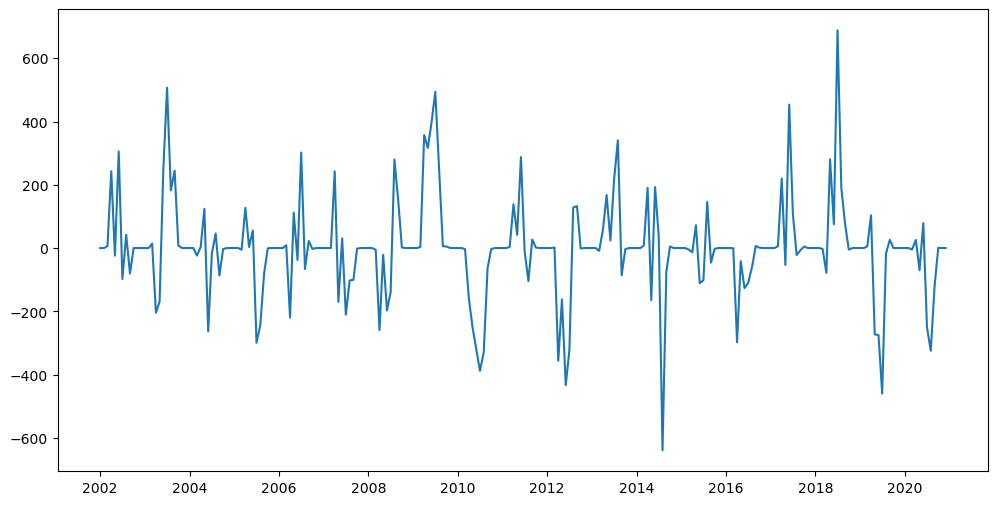

In [360]:
plt.figure(figsize=(12,6))
plt.plot(Sightings_Surveys['Year_Diff'])
plt.show()

In [362]:
# Testing stationarity
DickeyFullerTest = adfuller(Sightings_Surveys['Year_Diff'].dropna(),12)

print("\nStatistics analysis\n")
print("Statistic Test : " , DickeyFullerTest[0])
print("p-value : " , DickeyFullerTest[1])
print("# n_lags : " , DickeyFullerTest[2])
print("No of observation: " , DickeyFullerTest[3])
for key,value in DickeyFullerTest[4].items():
    print(f" critical value {key} : {value}")


Statistics analysis

Statistic Test :  -4.949887290369984
p-value :  2.786066614505922e-05
# n_lags :  12
No of observation:  215
 critical value 1% : -3.461136478222043
 critical value 5% : -2.875078880098608
 critical value 10% : -2.5739861168199027


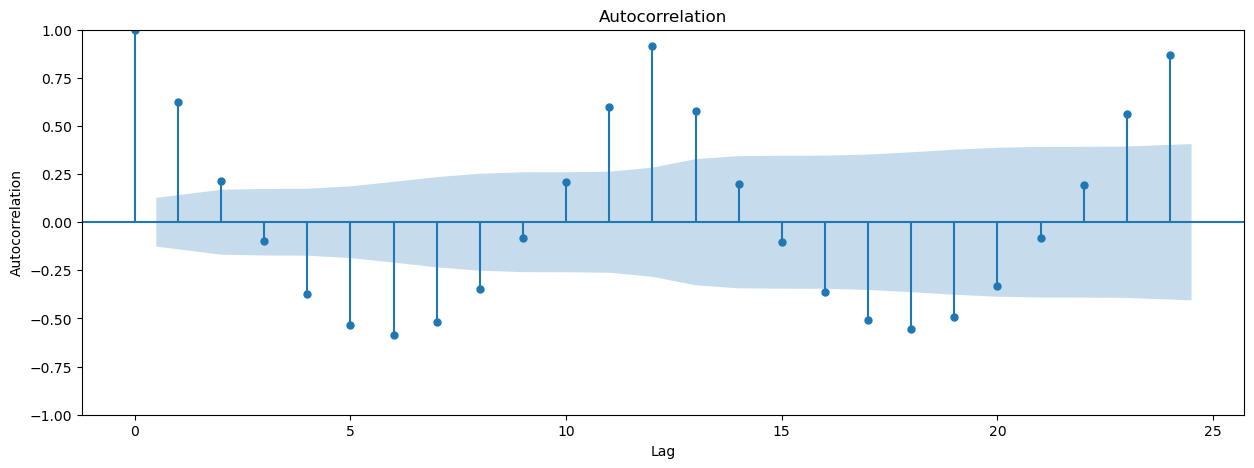

In [372]:
plt.figure(figsize=(15, 5))
plot_acf(Sightings_Surveys["Sightings_Weighted"].dropna(), lags=24, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

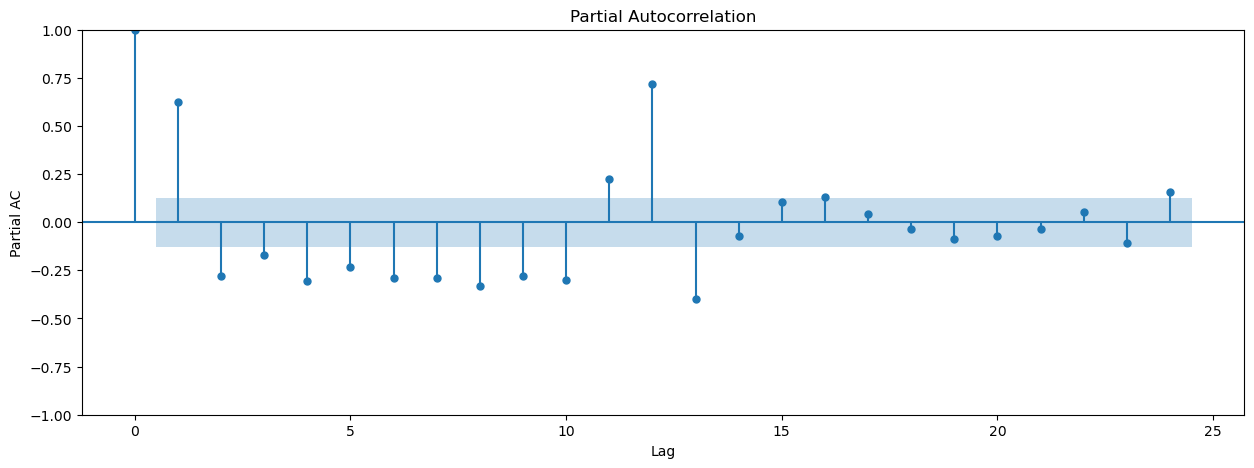

In [373]:
plt.figure(figsize=(15, 5))
plot_pacf(Sightings_Surveys["Sightings_Weighted"].dropna(), lags=24, ax=plt.gca(), method='ywm')
plt.xlabel('Lag')
plt.ylabel('Partial AC')
plt.show()

In [382]:
# Train/Test Split
print(len(Sightings_Surveys)*.75)
train = Sightings_Surveys['Sightings_Weighted'].iloc[:180]
test = Sightings_Surveys['Sightings_Weighted'].iloc[180:]

180.0


In [451]:
# Model
model = SARIMAX(train, order=(2, 1, 2), seasonal_order=(2, 1, 0, 12), trend='c')
model_fit = model.fit(disp=0)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                  Sightings_Weighted   No. Observations:                  180
Model:             SARIMAX(2, 1, 2)x(2, 1, [], 12)   Log Likelihood               -1034.556
Date:                             Sun, 24 Mar 2024   AIC                           2085.112
Time:                                     17:15:10   BIC                           2110.056
Sample:                                 01-01-2001   HQIC                          2095.236
                                      - 12-01-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.4557      0.427     -1.066      0.286      -1.293       0.382
ar.L1         -0.5573      0.072     -7.766      0.000      -0.698      -0.417
ar.L2          0.3715      0.076      4.892      0.000       0.223       0.520
ma.L1         -0.0003      4.325  -7.04e-05      1.000      -8.477       8.477
ma.L2         -0.9997      0.084    -11.965      0.000      -1.163      -0.836
ar.S.L12      -0.6655      0.053    -12.478      0.000      -0.770      -0.561
ar.S.L24      -0.4067      0.058     -6.964      0.000      -0.521      -0.292
sigma2      1.292e+04      0.000   3.88e+07      0.000    1.29e+04    1.29e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                36.86
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                             0.34
Prob(H) (two-sided):                  0.42   Kurtosis:                         5.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.7e+24. Standard errors may be unstable.
"""

In [413]:
# Evaluation - First defining a function to calculate the Mean Absolute Percentage Error (will serve to evaluate scores across models)
def mean_absolute_percentage_error(true_values, predicted_values):
    """
    Calculate the mean absolute percentage error. 
    Find the prediction error and devide by the true value, then average.
    """
    
    error = true_values - predicted_values
    absolute_percentage_error = np.abs(error/true_values)
    absolute_percentage_error = absolute_percentage_error.replace(np.inf, 0)    
    mape = absolute_percentage_error.mean() * 100
    return mape

In [446]:
# Evaluation - Models Results
predictions = model_fit.predict(start=0, end=len(train)+len(test)-d)

train_mape = mean_absolute_percentage_error(train, predictions[train.index])
test_mape = mean_absolute_percentage_error(test, predictions[test.index])

print(f"Train MAPE on the difference: {round(train_mape, 2)}%")
print(f"Test MAPE on the difference: {round(test_mape, 2)}%")

Train MAPE on the difference: 100.92%
Test MAPE on the difference: 268.53%


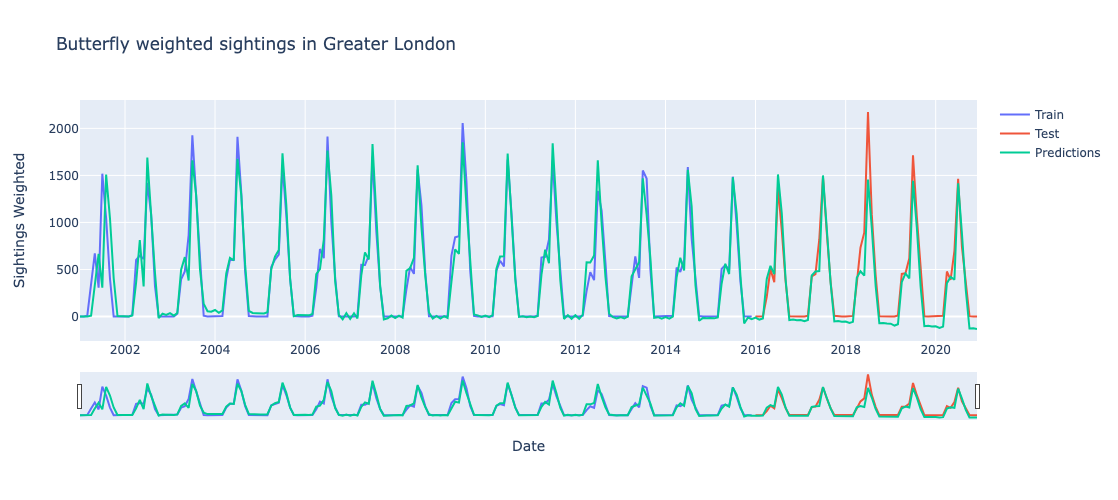

In [458]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test"))
fig.add_trace(go.Scatter(x=predictions.index, y=predictions, mode='lines', name="Predictions"))
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(yaxis_title="Sightings Weighted", xaxis_title="Date", title="Butterfly weighted sightings in Greater London",
                  width=1150, height=500)
fig.show()

In [448]:
# Plot residuals

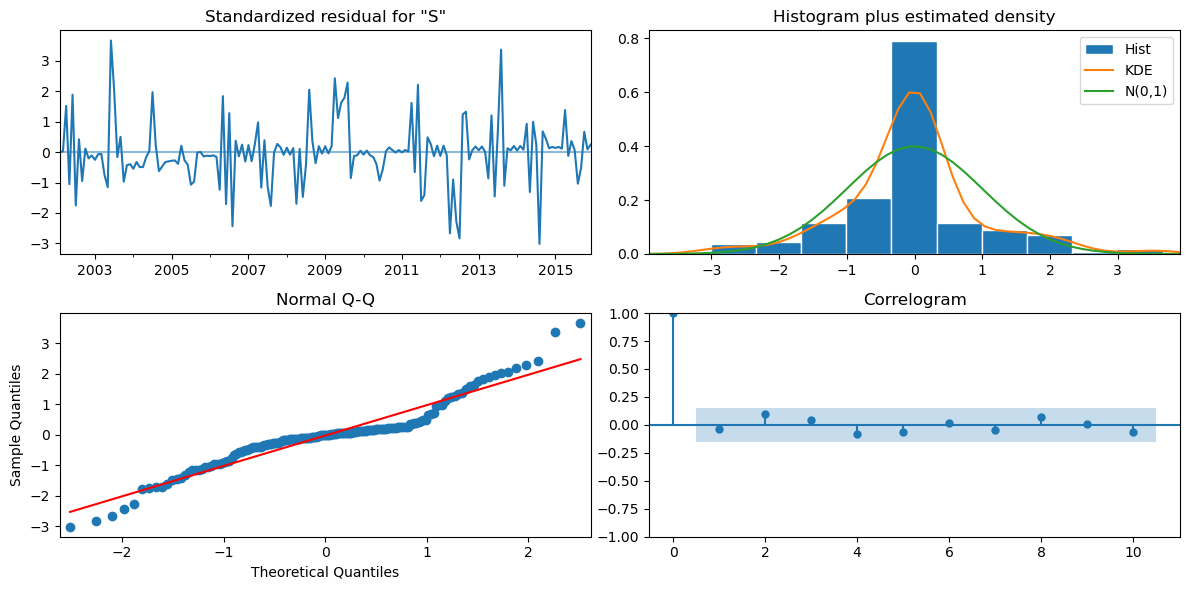

In [456]:
model_fit.plot_diagnostics(figsize=(12,6))
plt.tight_layout()
plt.show()

# Model Evaluation

# Next steps

(Personal notes)
- Butterfly data:
    - Regroup sightings London by week or month (depending on external info found)
    - Transform into index? Log?
    - EDA - Describe observations:
        - Missing data points?
        - Note that we can't have duplicated rows
        - Make sure we have complete years (from March to Feb)
        - Exclude 2020 for pandemic? first years?
        - General trend
        - Seasonal pattern (cross info with flight duration?)
    - Baseline model: Univariate model SARIMAX
    - Find average data external info London:
        - Air quality: which pollutant to consider?
        - Weather: Temperatures, rainfall, wind, ...
    - Scale?
    - Multivariate models:
        - Check stationarity (Dickey–Fuller test)
        - VAR model (captures seasonality - needed?) / mSSA / Prophet / LSTM? / Kats? / Random forest? => Each needs stationarity?
        - Test causality (!! data needs to be non stationnary?)
        - Tune with predictions for external factors (Net Zero / Air quality... depending on which var is predictive of B pop)

__Question__: do you need to specify different lag per metric (like temperature has an impact 2 months after, pollutant 1 month after...)?

__NOTE__: how many months / year do we want to predict?

- Gather data about positive efforts towards environement in London:
    - Butterfly conservation efforts
    - No emission zone start dates
- Study by species:
    - Trend by species? Scatter coeff trend VS each LepTraits?
    - Group by vulnerability? Scatter London coeff trend VS UK vulnerability group? (attention: Zoom on London)

# _Tests

## Var Model

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
mdata = sm.datasets.macrodata.load_pandas().data
mdata.head()

In [ ]:
# prepare the dates index
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
quarterly.head()

In [ ]:
from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)
quarterly

In [ ]:
In [10]: mdata = mdata[['realgdp','realcons','realinv']]
mdata.head()

In [ ]:
import pandas 
mdata.index = pandas.DatetimeIndex(quarterly)
mdata.head()

In [ ]:
import numpy as np
data = np.log(mdata).diff().dropna()
data.tail()

In [ ]:
model = VAR(data)

In [ ]:
results = model.fit(2)
results.summary()

In [ ]:
results.plot()

In [ ]:
results.plot_acorr()

In [ ]:
model.select_order(15)

In [ ]:
results.test_causality('realgdp', ['realinv', 'realcons'], kind='wald', signif=0.9)

# _Archives

## D3 - UK Weighted Sightings

In [ ]:
df_Sightings_Year_Weighted = pd.read_csv('data/Sightings_year_weighted.csv')

In [ ]:
df_Sightings_Year_Weighted.head()

In [ ]:
df_Sightings_Year_Weighted.shape

In [ ]:
df_Sightings_Year_Weighted['Start_date_year'].min()

In [ ]:
df_Sightings_Year_Weighted['Start_date_year'].max()

## Weather / Sightings correlation?

Notes: Test with London temperatures for whole UK Sightings - need to be updated to UK weather data

In [ ]:
df_london_weather2 = df_london_weather[(df_london_weather['yyyy'] >= 2001) & (df_london_weather['yyyy'] <= 2020)]
df_london_weather2

In [ ]:
df_london_weather2 = pd.DataFrame(df_london_weather2.groupby('yyyy')['tmax'].mean()).reset_index()

In [ ]:
# Merge Sightings and Weather
df_Sightings_Year_Weighted2 = pd.merge(df_Sightings_Year_Weighted, df_london_weather2, left_on='Start_date_year', right_on='yyyy', 
                                       how='left')

In [ ]:
df_Sightings_Year_Weighted2 = df_Sightings_Year_Weighted2.drop(columns=['Unnamed: 0', 'index', 'count', 'weight', 'yyyy'])

In [ ]:
plt.subplots(1,2, figsize=[15,6])

plt.subplot(1,2,1)
plt.plot(df_Sightings_Year_Weighted2['Start_date_year'], df_Sightings_Year_Weighted2['tmax'])
plt.title('Temperatures')

plt.subplot(1,2,2)
plt.plot(df_Sightings_Year_Weighted2['Start_date_year'], df_Sightings_Year_Weighted2['counts_weighted'])
plt.title('Weighted sightings')

plt.tight_layout()
plt.show()

In [ ]:
sns.heatmap(df_Sightings_Year_Weighted2.corr(), annot=True)

In [ ]:
stats.pearsonr(df_Sightings_Year_Weighted2['tmax'], df_Sightings_Year_Weighted2['counts_weighted'])

In [ ]:
stats.pearsonr(df_Sightings_Year_Weighted2['tmax'], df_Sightings_Year_Weighted2['Start_date_year'])